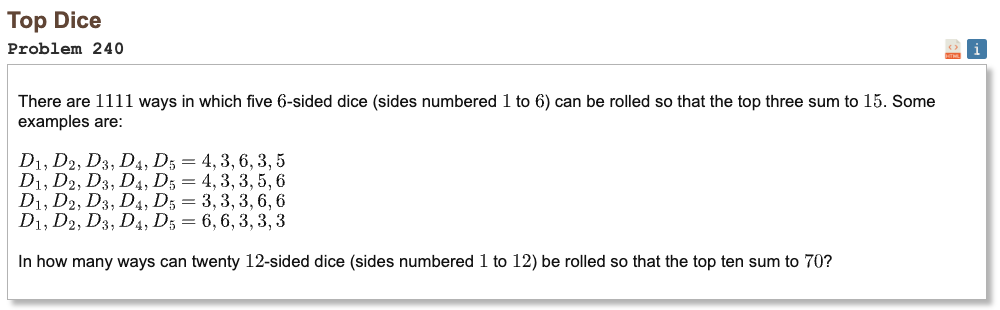

## Initial approach

* notice the condition depends only on the multiset of 20 dice values, not their positions
* let m be the 10th largest value, so every value below the top ten is at most m
* let A be how many dice are strictly bigger than m, then the top ten contain those A dice plus exactly (10-A) dice equal to m
* that forces a target sum for the A dice above m, namely 70 minus m times (10-A)
* count W, the number of ordered length A sequences using values m+1 to 12 that hit that target sum, via a small dynamic program
* choose which A positions in the 20 are the values above m, and in the remaining positions choose which (10-t) are values below m (with t being how many extra m values sit in the bottom ten)
* fill the (10-t) below-m positions in (m-1)^(10-t) ways, and the m positions are forced, then add everything up over m, A, and t

In [1]:
from math import comb

def count_sequences(length, target, low, high):
    if target < 0:
        return 0
    if length == 0:
        return 1 if target == 0 else 0
    dp = [0] * (target + 1)
    dp[0] = 1
    vals = list(range(low, high + 1))
    for _ in range(length):
        ndp = [0] * (target + 1)
        for s in range(target + 1):
            c = dp[s]
            if c:
                for v in vals:
                    ns = s + v
                    if ns <= target:
                        ndp[ns] += c
        dp = ndp
    return dp[target]

def solve():
    total = 0
    for m in range(1, 13):
        for A in range(0, 11):
            target = 70 - m * (10 - A)
            low = m + 1
            high = 12
            if low > high:
                continue
            min_sum = low * A
            max_sum = high * A
            if target < min_sum or target > max_sum:
                continue
            W = count_sequences(A, target, low, high)
            if W == 0:
                continue
            ways_choose_A = comb(20, A)
            for t in range(0, 11):
                ways_choose_low = comb(20 - A, 10 - t)
                ways_fill_low = (m - 1) ** (10 - t)
                total += ways_choose_A * ways_choose_low * W * ways_fill_low
    return total

In [2]:
%%time
result = solve()
print("Result:", result)

Result: 9954634910195558042
CPU times: user 10.5 ms, sys: 901 μs, total: 11.4 ms
Wall time: 10.7 ms
